# Section 16 Neural Network (and Deep Learning)

## Basic Structures of Neural Network (NN)

Intuitively, Neural Network is nothing but the construction of one nonlinear (vector-valued) function $\mathbf{h}(\mathbf{x}; W, b)\in\mathbb{R}^{p}\to\mathbb{R}^{k}$ with a series of composite functions (layers). For the interactive visualization and exploration of NN, you can refer [here](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.45692&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

The layers can be further classified into three categories:

- **Input layer**: $p$ nodes representing the input sample $x\in\mathbb{R}^{p}$


- **Hidden layers**: Calculate the values on the nodes of $(l+1)$-th layers based on those on the $l$-th layer as
$$
\begin{aligned}
\mathbf{z}^{(l+1)} &= W^{(l)} \mathbf{a}^{(l)} + \mathbf{b}^{(l)}   \\
\mathbf{a}^{(l+1)} &= \sigma(\mathbf{z}^{(l+1)})
\end{aligned}
$$
where $\sigma$ is the nonlinear [activation function](https://en.wikipedia.org/wiki/Activation_function) (common choices include sigmoid, tanh or ReLU), and the second equation is element-wise.
  
    *Note*: Suppose there are $m$ nodes in layer $l$ and $n$ nodes in layer $(l+1)$. Then there are $(m+1)\times n$ trainable parameters between the two layers, or sometimes by convention, we just say they are the parameters are on the $(l+1)$-th layer.


- **Output layer**: $k$ nodes representing the output, and dependent on the problem can be:

    1) For regression problem, just as another regular hidden layer of $k$ nodes
   
    2) For classification problem, apply the [softmax function](https://en.wikipedia.org/wiki/Softmax_function) on the vector $\mathbf{z}$ to ensure that the output is the probability vector for $k$ classes.


After constructing the mapping, in supervised problem, the loss function $J(W,b; \mathbf{x}, y)$ can be chosen the same as other machine learning models.

- For regression: MSE (mean squared error)

- For classification: Cross Entropy

**Interesting Facts** (not required in exam):

- Logistic regression can be viewed as "the simplest" NN with only the input layer ($p$ nodes) and output layer (softmax output). Because it only has ["one layer of parameters"](https://www.datasciencecentral.com/profiles/blogs/logistic-regression-as-a-neural-network#:~:text=To%20recap%2C%20Logistic%20regression%20is,a%20one%2Dlayer%20neural%20network.), sometimes it is also called [single-layer NN](http://yann.lecun.com/exdb/mnist/).


- NN can also be used in unsupervised tasks, such as [Autoencoder](https://en.wikipedia.org/wiki/Autoencoder#:~:text=An%20autoencoder%20is%20a%20type,to%20ignore%20signal%20%E2%80%9Cnoise%E2%80%9D.) for dimension reduction.


## Training Algorithms: BP (Back Propagation) and SGD (or other optimization method)

As we've known well, training the machine learning model is largely dependent on minimizing the loss function, where its gradient provides the important information.

Intuitively speaking, **back propagation** is just the right algorithm to find such gradient for the training of NN, which is based on the **chain-rule** of derivatives in hierarchical network-structured composite function.

In detail, the backpropagation algorithm for NN training can be described as (not required):

> Step 1: Perform a **forward pass**, computing the values for layers $L_2$, $L_3$, and so on up to the output layer $L_{n_l}$. We take the loss of MSE in regression as example.
>
> Step 2: For each output unit $i$ in layer $n_l$ (the output layer), set
$$
\delta^{(n_l)}_i
:= \frac{\partial}{\partial z^{(n_l)}_i} \;J(W,b; \mathbf{x}, y) = \frac{\partial}{\partial z^{(n_l)}_i} 
\frac{1}{2} \left\|y - h(\mathbf{x};W,b)\right\|^2 = - (y - a^{(n_l)}_i) \cdot \sigma'(z^{(n_l)}_i)
$$
>
> Step 3: For $l=n_l−1,n_l−2,n_l−3,\dots,2$ For each node $i$ in layer $l$, set
$$\delta^{(l)}_i : = \frac{\partial}{\partial z^{(l)}_i} \;J(W,b; \mathbf{x}, y) =
\frac{\partial}{\partial a^{(l)}_i} \;J(W,b; \mathbf{x}, y)  
\frac{\partial a^{(l)}_i}{\partial z^{(l)}_i}=  \left( \sum_{j=1}^{s_{l+1}} w^{(l)}_{ji} \delta^{(l+1)}_j \right) \sigma'(z^{(l)}_i)
$$
>
> Step 4: the desired partial derivatives are computed as:
$$
\begin{aligned}
\frac{\partial}{\partial w_{ij}^{(l)}} J(W,b; \mathbf{x}, y) &= a^{(l)}_j \delta_i^{(l+1)} \\
\frac{\partial}{\partial b_{i}^{(l)}} J(W,b; \mathbf{x}, y) &= \delta_i^{(l+1)}.
\end{aligned}
$$

After obtaining the gradient with BP, we can then use stochastic gradient descent (SGD, or other methods) to minimize the loss function.

## Deep Learning: What packages/platforms to choose?

By making the NN "deeper" (increase the hidden layers and add other complex structures), we have the deep learning models. Of course, deep NN will face the serious problem of overfitting (can be alleviated by regulariztion or dropout) and huge computation cost (can be solved by using GPU instead of CPU).

The [neural network models](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) in scikit-learn does not provide the flexible support for large-scale deep learning applications.

For beginners, [Keras](https://keras.io/) (high-level API that supports [tensorflow](https://www.tensorflow.org/), which developed by Google) and [Pytorch](https://pytorch.org/) (developed by Facebook) are the most accessible and popular deep learning packages in Python.

To get acess to free GPU resources for training deep learning models (see here for [why GPU is widely applied in deep learning](https://www.analyticsvidhya.com/blog/2017/05/gpus-necessary-for-deep-learning/)), you can use the online notebook provided by Kaggle or [google colab](https://colab.research.google.com/notebooks/intro.ipynb). If you are using very basic Keras or Pytorch, there's no need to change the code much to adopt to GPU computation. With GPU, you can even give up sklearn and replace much of your codes using the GPU-version machine learning algorithms with the package [cuml](https://github.com/rapidsai/cuml).

## Exploring Deep Learning with Keras

Let's build our first "deep learning" model (indeed a simple Neural Network model trained with deep learning package)

In [1]:
pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4832 sha256=576b51813960de865a938e75338ac3996f73b0a47bbd9d0c37257904037743ed
  Stored in directory: c:\users\lukea\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\lukea\anaconda3\python.exe -m pip install --upgrade pip' command.


You can also setup the gpu if it is supported in your local computer -- unfortunately, recent versions of mac OS are no longer supported. https://www.tensorflow.org/install/gpu

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

C:\Users\lukea\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# sequential model to define a graph of neural network
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),# input layer
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer
  tf.keras.layers.Dense(64, activation='relu'), # hidden layer
  tf.keras.layers.Dense(10, activation='softmax') # output layer for classification
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#'adam' is an algorithm for SGD

In [6]:
model.fit(x_train, y_train, epochs=100, batch_size = 2048)
model.evaluate(x_test, y_test)

Epoch 1/100
30/30 [==============================] - 1s 16ms/step - loss: 1.1616 - accuracy: 0.7007
Epoch 2/100
30/30 [==============================] - 0s 16ms/step - loss: 0.3508 - accuracy: 0.9003
Epoch 3/100
30/30 [==============================] - 0s 16ms/step - loss: 0.2617 - accuracy: 0.9265
Epoch 4/100
30/30 [==============================] - 1s 17ms/step - loss: 0.2179 - accuracy: 0.9390
Epoch 5/100
30/30 [==============================] - 0s 16ms/step - loss: 0.1892 - accuracy: 0.9466
Epoch 6/100
30/30 [==============================] - 1s 17ms/step - loss: 0.1672 - accuracy: 0.9531
Epoch 7/100
30/30 [==============================] - 1s 17ms/step - loss: 0.1486 - accuracy: 0.9576
Epoch 8/100
30/30 [==============================] - 1s 18ms/step - loss: 0.1337 - accuracy: 0.9624
Epoch 9/100
30/30 [==============================] - 1s 17ms/step - loss: 0.1222 - accuracy: 0.9654
Epoch 10/100
30/30 [==============================] - 1s 18ms/step - loss: 0.1115 - accuracy: 0.9685

30/30 [==============================] - 0s 16ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 83/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 88/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 89/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 90/100
30/30 [==============================] - 0s 16ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 91/100
30/30 [==============================] - 1s 17ms/step - loss: 0.0011 - accuracy: 1.0000
Epo

[0.10332278907299042, 0.9782000184059143]

We can also try autoencoder for the dimension reduction

In [7]:
from tensorflow.keras import layers
# functional API to define a graph of neural network -- more flexible than sequential

input_img = keras.Input(shape=(784,)) # input layer
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(8, activation='relu')(encoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [8]:
autoencoder = keras.Model(input_img, decoded) # builds up the model
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                                 
 dense_5 (Dense)             (None, 8)                 264       
                                                                 
 dense_6 (Dense)             (None, 2)                 18        
                                                                 
 dense_7 (Dense)             (None, 8)                 24        
                                                                 
 dense_8 (Dense)             (None, 32)                288   

In [9]:
autoencoder.compile(optimizer='adam', loss= tf.keras.losses.MeanSquaredError())

autoencoder.fit(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))), x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))),
                epochs=200,
                batch_size=1024)

Epoch 1/200
10/10 [==============================] - 1s 26ms/step - loss: 0.2247
Epoch 2/200
10/10 [==============================] - 0s 26ms/step - loss: 0.1524
Epoch 3/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0800
Epoch 4/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0741
Epoch 5/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0730
Epoch 6/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0723
Epoch 7/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0720
Epoch 8/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0716
Epoch 9/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0713
Epoch 10/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0710
Epoch 11/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0706
Epoch 12/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0700
Epoch 13/200
10/10 [=====

10/10 [==============================] - 0s 25ms/step - loss: 0.0581
Epoch 102/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0579
Epoch 103/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0579
Epoch 104/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0579
Epoch 105/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0578
Epoch 106/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0577
Epoch 107/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0576
Epoch 108/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0575
Epoch 109/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0575
Epoch 110/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0574
Epoch 111/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0574
Epoch 112/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0573
Epoch 113/200
10/1

10/10 [==============================] - 0s 23ms/step - loss: 0.0536
Epoch 200/200
10/10 [==============================] - 0s 23ms/step - loss: 0.0535


In [10]:
encoder = keras.Model(input_img, encoded) # also define the encoder part
encoder.get_weights()

[array([[ 0.0167705 , -0.06118182, -0.07008564, ..., -0.07848012,
         -0.01317923, -0.07579838],
        [ 0.00337351, -0.07196932,  0.02814481, ..., -0.0766101 ,
          0.04692689, -0.07144999],
        [-0.01135527,  0.05151781, -0.01107565, ...,  0.00835322,
          0.03322036,  0.00770801],
        ...,
        [ 0.07281924,  0.01429179, -0.07199834, ...,  0.02437991,
         -0.07416657,  0.0794998 ],
        [ 0.07573677,  0.03407025,  0.07733425, ..., -0.04538144,
         -0.0055593 , -0.0054282 ],
        [ 0.07134808,  0.06898525,  0.03425436, ...,  0.08018897,
         -0.04990906, -0.01550183]], dtype=float32),
 array([ 0.11475703, -0.01950947, -0.0173357 ,  0.16215044,  0.0540249 ,
         0.11559517,  0.30052522,  0.07076579, -0.01573037,  0.11795185,
         0.04924708, -0.01570477,  0.5074853 , -0.01883628,  0.7931744 ,
        -0.07542144, -0.01897082,  0.06048005,  0.8369053 ,  0.05708839,
        -0.04265947,  0.07577762, -0.016127  ,  0.06957314,  0.034

In [11]:
encoded_coord = encoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))

313/313 [==============================] - 1s 2ms/step


C:\Users\lukea\AppData\Local\Temp\ipykernel_9324\2858493173.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


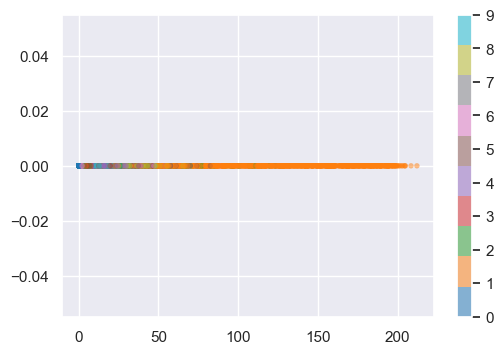

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure(dpi=100)
plt.scatter(encoded_coord[:, 0], encoded_coord[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()

In [13]:
decoded_imgs = autoencoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))

313/313 [==============================] - 1s 3ms/step


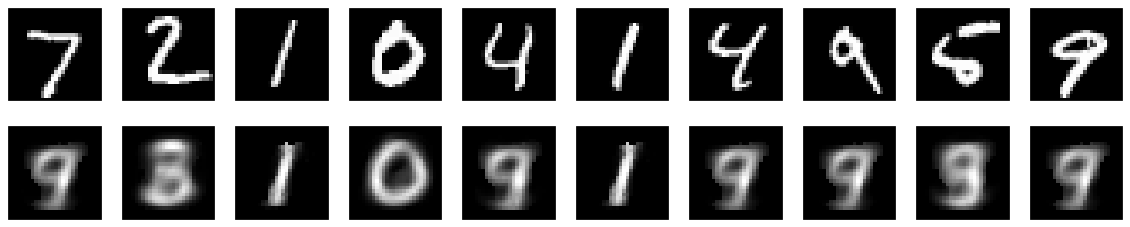

In [14]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Maybe condensing to 2D layer loses too much information. Let's try a more realistic model

In [15]:
from tensorflow.keras import layers
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 128)               8320      
                                                                 
 dense_16 (Dense)            (None, 784)               1011

In [16]:
autoencoder.compile(optimizer='adam', loss= tf.keras.losses.MeanSquaredError())

autoencoder.fit(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))), x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))),
                epochs=200,
                batch_size=256)

Epoch 1/200
40/40 [==============================] - 1s 8ms/step - loss: 0.1164
Epoch 2/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0697
Epoch 3/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0592
Epoch 4/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0504
Epoch 5/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0420
Epoch 6/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0377
Epoch 7/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0346
Epoch 8/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0323
Epoch 9/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0303
Epoch 10/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0281
Epoch 11/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0261
Epoch 12/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0248
Epoch 13/200
40/40 [=================

40/40 [==============================] - 0s 7ms/step - loss: 0.0095
Epoch 103/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 104/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0094
Epoch 105/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 106/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 107/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 108/200
40/40 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 109/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 110/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 111/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 112/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 113/200
40/40 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 114/200
40/40 [=========

In [17]:
encoder = keras.Model(input_img, encoded)
encoded_coord = encoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))
encoded_coord.shape

313/313 [==============================] - 1s 2ms/step


(10000, 32)

C:\Users\lukea\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\lukea\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\lukea\AppData\Local\Temp\ipykernel_9324\1819409330.py:8: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


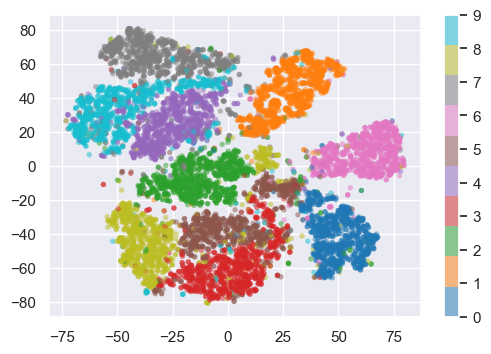

In [18]:
from sklearn.manifold import TSNE # for GPU acceleration, use the cuml
tsne = TSNE(n_jobs = -1)
X_tsne = tsne.fit_transform(encoded_coord)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
fig = plt.figure(dpi=100)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=y_test, s=15, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar()

313/313 [==============================] - 1s 2ms/step


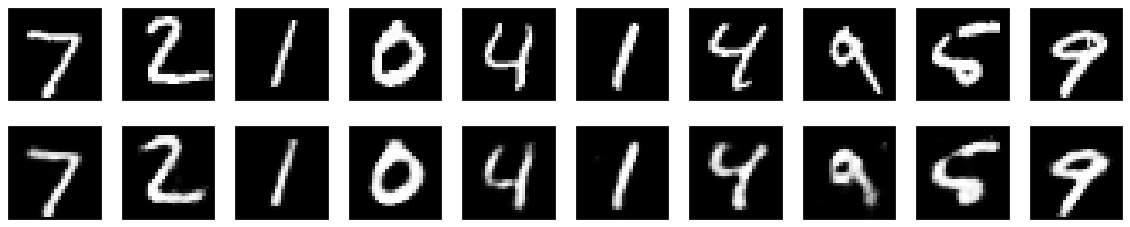

In [19]:
decoded_imgs = autoencoder.predict(x_test.reshape((len(x_test), np.prod(x_test.shape[1:]))))
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Other Useful References and Suggestions for Future Learning in Data Science
### Websites for Everyday Practice
- Python Programming: [Leetcode](https://leetcode.com/)
- Data Science: [Kaggle](https://www.kaggle.com/)

### Courses and Books
- UCI ICS 31-33 (Python Programming), CS 178 (Machine Learning)
- [Berkeley Stat 157](https://courses.d2l.ai/berkeley-stat-157/index.html)
- [Stanford CS 231](http://cs231n.stanford.edu/)
- [The Deep Learning Book](https://www.deeplearningbook.org/)